# Lab 2

Note: I don't think this lab was run very well. The lectures were delivered far too late compared to the workload required for this lab. I can imagine the level of work here usually required by a piece of coursework. Having 10% of the overall mark designated to this lab, and the material only being properly taught in-person 3 days before the hand in date, seems really unfair. There's people that really need time to complete their work, and to a standard that would receive a good grade. The overall degree grade is incredibly dependent on this semester for some people. The material wasn't easy to understand either. Just incredibly confused as to why this lab was set with these circumstances.

# PART 1; Needleman-Wunsch Algorithm

\begin{equation}
  F_{i,j} = max
    \begin{cases} 
      F_{i-1,j-1} + s_{a_i,b_j}\\
      F_{i-1,j} + d\\
      F_{i,j-1} + d
    \end{cases}       
\end{equation}

In [1]:
import numpy as np
from Bio.SubsMat import MatrixInfo

C:\Users\Cryao\anaconda3\Lib\site-packages\Bio\SubsMat\__init__.py:126: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  warnings.warn(


In [2]:
#https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm
gap_penalty = -8

#gap penalties and substitution for blosum50
def s(a, b, substitution_matrix, d):
    if a == '-' or b == '-':
        return d
    else:
        return substitution_matrix.get((a, b), substitution_matrix.get((b, a), d))

# follows wikipedia page
def needleman(x, y, substitution_matrix, d):
    # set up grid
    seq1 = [*x]
    seq2 = [*y]
    n = len(seq1)
    m = len(seq2)
    grid_size = (m + 1, n + 1)
    F = np.zeros(grid_size)

    # initialize values
    for i in range(1, m + 1):
        F[i][0] = F[i-1][0] + d
    for j in range(1, n + 1):
        F[0][j] = F[0][j-1] + d

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = F[i-1][j-1] + s(seq1[j-1], seq2[i-1], substitution_matrix, d)
            delete = F[i-1][j] + d
            insert = F[i][j-1] + d
            F[i][j] = max(match, insert, delete)

    alignmentA = ''
    alignmentB = ''
    i = m
    j = n

    while i > 0 or j > 0:
        if i > 0 and j > 0 and F[i][j] == F[i-1][j-1] + s(seq1[j-1], seq2[i-1], substitution_matrix, d):
            alignmentB += seq1[j-1]
            alignmentA += seq2[i-1]
            i -= 1
            j -= 1
        elif i > 0 and F[i][j] == F[i-1][j] + d:
            alignmentB += '-'
            alignmentA += seq2[i-1]
            i -= 1
        else:
            alignmentB += seq1[j-1]
            alignmentA += '-'
            j -= 1
    
    # unwrap arrays
    alignmentB = alignmentB[::-1]
    alignmentA = alignmentA[::-1]

    return alignmentB, alignmentA, F

#BLOSUM50 for letter combinations
substitution_matrix_blosum50 = MatrixInfo.blosum50

result1, result2, grid = needleman('HEAGAWGHEE', 'PAWHEAE', substitution_matrix_blosum50, gap_penalty)

print('Alignment matrix:')
print(grid)

print('Results:')
print(result1)
print(result2)

result1, result2, grid = needleman('SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL', 
                                   'PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY', 
                                   substitution_matrix_blosum50, gap_penalty)

print('Alignment matrix:')
print(grid)

print('Results:')
print(result1)
print(result2)

Alignment matrix:
[[  0.  -8. -16. -24. -32. -40. -48. -56. -64. -72. -80.]
 [ -8.  -2.  -9. -17. -25. -33. -41. -49. -57. -65. -73.]
 [-16. -10.  -3.  -4. -12. -20. -28. -36. -44. -52. -60.]
 [-24. -18. -11.  -6.  -7. -15.  -5. -13. -21. -29. -37.]
 [-32. -14. -18. -13.  -8.  -9. -13.  -7.  -3. -11. -19.]
 [-40. -22.  -8. -16. -16.  -9. -12. -15.  -7.   3.  -5.]
 [-48. -30. -16.  -3. -11. -11. -12. -12. -15.  -5.   2.]
 [-56. -38. -24. -11.  -6. -12. -14. -15. -12.  -9.   1.]]
Results:
HEAGAWGHE-E
--P-AW-HEAE
Alignment matrix:
[[   0.   -8.  -16. ... -248. -256. -264.]
 [  -8.   -1.   -9. ... -230. -238. -246.]
 [ -16.   -3.    0. ... -217. -225. -233.]
 ...
 [-256. -243. -230. ...    5.   10.    2.]
 [-264. -251. -238. ...   -3.    3.   15.]
 [-272. -259. -246. ...  -11.   -5.    7.]]
Results:
-SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL-
PSPTMEAVTSVEA-STASHPHSTSSYFATTYYHLY


# Part 2; Smith-Waterman Algorithm

\begin{equation}
  F_{i,j} = max
    \begin{cases}
      0\\
      F_{i-1,j-1} + s_{a_i,b_j}\\
      F_{i-1,j} + d\\
      F_{i,j-1} + d
    \end{cases}       
\end{equation}

In [3]:
# https://en.wikipedia.org/wiki/Smith%E2%80%93Waterman_algorithm
# mainly introduces the max 0 value
# backwards path begins at maximum value

gap_penalty = -8

def s(a, b, substitution_matrix, d):
    if a == '-' or b == '-':
        return d
    else:
        return substitution_matrix.get((a, b), substitution_matrix.get((b, a), d))

def needleman(x, y, substitution_matrix, d):
    seq1 = [*x]
    seq2 = [*y]
    n = len(seq1)
    m = len(seq2)
    grid_size = (m + 1, n + 1)
    F = np.zeros(grid_size)

    for i in range(1, m + 1):
        F[i][0] = F[i-1][0] + d
    for j in range(1, n + 1):
        F[0][j] = F[0][j-1] + d

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = F[i-1][j-1] + s(seq1[j-1], seq2[i-1], substitution_matrix, d)
            delete = F[i-1][j] + d
            insert = F[i][j-1] + d
            # introduce 0 max value
            F[i][j] = max(match, insert, delete, 0)

    alignmentA = ''
    alignmentB = ''
    
    # begin backwards path at max value
    max_score = np.max(F)
    max_indices = np.argwhere(F==max_score)
    
    i, j = max_indices[0]

    while i > 0 or j > 0:
        if i > 0 and j > 0 and F[i][j] == F[i-1][j-1] + s(seq1[j-1], seq2[i-1], substitution_matrix, d):
            alignmentB += seq1[j-1]
            alignmentA += seq2[i-1]
            i -= 1
            j -= 1
        elif i > 0 and F[i][j] == F[i-1][j] + d:
            alignmentB += '-'
            alignmentA += seq2[i-1]
            i -= 1
        else:
            alignmentB += seq1[j-1]
            alignmentA += '-'
            j -= 1

        if F[i][j] <= 0:
            break
    
    alignmentB = alignmentB[::-1]
    alignmentA = alignmentA[::-1]

    return alignmentB, alignmentA, F

substitution_matrix_blosum50 = MatrixInfo.blosum50

result1, result2, grid = needleman('HEAGAWGHEE', 'PAWHEAE', substitution_matrix_blosum50, gap_penalty)

print('Alignment matrix:')
print(grid)

print('Results:')
print(result1)
print(result2)

result1, result2, grid = needleman('MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY', 
                                   'TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI', 
                                   substitution_matrix_blosum50, gap_penalty)

print('Alignment matrix:')
print(grid)

print('Results:')
print(result1)
print(result2)

Alignment matrix:
[[  0.  -8. -16. -24. -32. -40. -48. -56. -64. -72. -80.]
 [ -8.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-16.   0.   0.   5.   0.   5.   0.   0.   0.   0.   0.]
 [-24.   0.   0.   0.   2.   0.  20.  12.   4.   0.   0.]
 [-32.   0.   0.   0.   0.   0.  12.  18.  22.  14.   6.]
 [-40.   0.   6.   0.   0.   0.   4.  10.  18.  28.  20.]
 [-48.   0.   0.  11.   3.   5.   0.   4.  10.  20.  27.]
 [-56.   0.   6.   3.   8.   2.   2.   0.   4.  16.  26.]]
Results:
AWGHE
AW-HE
Alignment matrix:
[[   0.   -8.  -16. ... -464. -472. -480.]
 [  -8.    0.    0. ...    0.    0.    0.]
 [ -16.    0.    0. ...    0.    0.    0.]
 ...
 [-352.    0.    0. ...  141.  133.  125.]
 [-360.    0.    1. ...  156.  148.  140.]
 [-368.    0.    0. ...  169.  161.  153.]]
Results:
HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRI
HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI


# Part 3; HMM

In [4]:
#https://github.com/hmmlearn/hmmlearn
#https://hmmlearn.readthedocs.io/en/latest/auto_examples/plot_casino.html

import numpy as np
from hmmlearn import hmm

# define the model parameters
gen_model = hmm.CategoricalHMM(n_components=2, random_state=1)
gen_model.startprob_ = np.array([1.0, 0.0])

gen_model.transmat_ = np.array([[0.9, 0.1],
                                [0.1, 0.9]])

gen_model.emissionprob_ = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
                                     [1/10, 1/10, 1/10, 1/10, 1/10, 1/2]])

# generate a sequence of observations
sequence_length = 62
observations, states = gen_model.sample(sequence_length)

# map the state values to fair and loaded 
state_mapping = {0: 'F', 1: 'L'}
states_mapped = [state_mapping[state] for state in states]

# storing sequence in variable
sequence_casino = ''.join(map(str, observations.flatten()))

print('Generated Sequence:\n', sequence_casino)
print('',''.join(states_mapped))

Generated Sequence:
 41023454315450525354554214100422335151355355555253325550545001
 FFFFFFFFFFFFFFFFLLLFLLLLLFFFFFFFFFLLLLLLLLLLLLLLLFFFLFFFLFFFFF


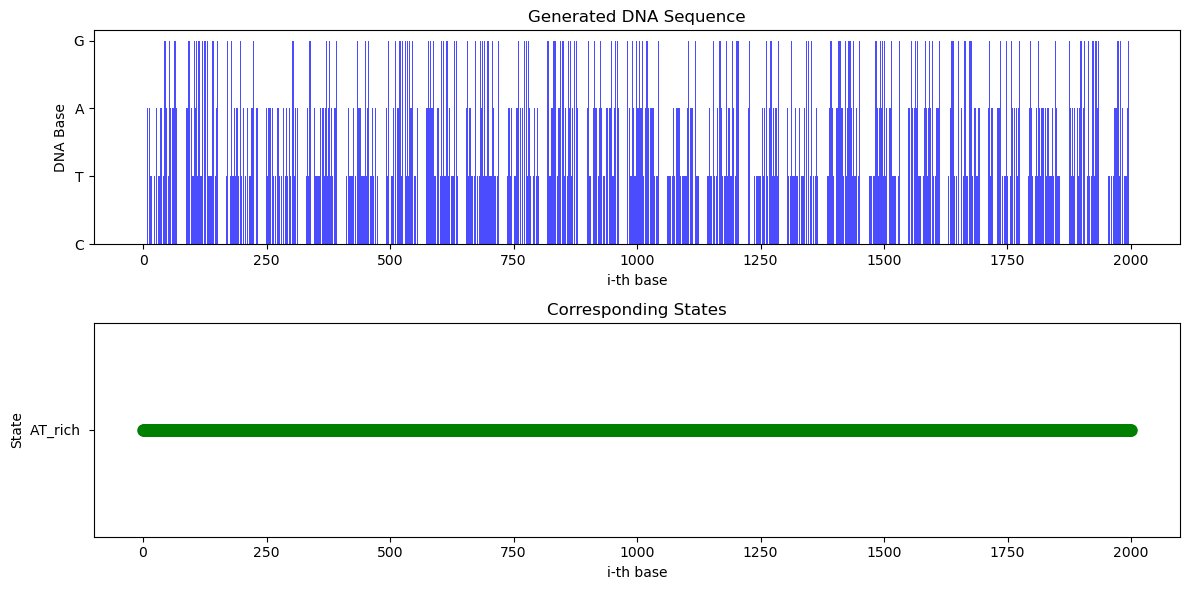

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

# define the model parameters
gen_model = hmm.CategoricalHMM(n_components=2, random_state=1)
gen_model.startprob_ = np.array([0.5, 0.5])

gen_model.transmat_ = np.array([[0.9997, 0.0003],
                                [0.0002, 0.9998]])

# assuming the probabilities DO ADD UP TO 1... 0.3297 - 0.006 
gen_model.emissionprob_ = np.array([[0.2698, 0.3237, 0.2080, 0.1985],
                                     [0.2459, 0.2079, 0.2478, 0.2984]])

# sequence is 2000 bases long
sequence_length = 2000
observations, states = gen_model.sample(sequence_length)

# map 0,1,2,3 with ATCG respectively
base_mapping = {0: 'A', 1: 'T', 2: 'C', 3: 'G'}
observations_mapped = [base_mapping[obs] for obs in observations.flatten()]

# map state values
state_mapping = {0: 'AT_rich ', 1: 'CG_rich '}
states_mapped = [state_mapping[state] for state in states]

# Plot the DNA sequence
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.bar(range(len(observations_mapped)), observations_mapped, color='blue', alpha=0.7)
plt.title('Generated DNA Sequence')
plt.xlabel('i-th base')
plt.ylabel('DNA Base')

# Plot the corresponding states
plt.subplot(2, 1, 2)
plt.plot(states_mapped, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=8)
plt.title('Corresponding States')
plt.xlabel('i-th base')
plt.ylabel('State')

plt.tight_layout()
plt.show()

In [6]:
sequence_bases = ''.join(observations_mapped)
print("Generated Sequence:\n", sequence_bases)

Generated Sequence:
 CTATTCGCTAGCGAGTTTGCCCTTACAAACTTTTTAGATCCTGGCGTATCTTCGGACCGAAATGTGAATCAAACAGACTGTGATTGTCATAAGCGACGAGTCTTGGATGATGGGGTTCTGGACTGGGGCTGCTTTTTCTCGTGGCCTAAAGTTATGATAGCATCCCTAGTGGCCACATTGATCTAACTCATAATTCAGCTGCGATCCTTCAAACCTTTAAAAGGACGCTAGATATTTAGTGCCATGAGGAAATAATATAGCGAATACCTTCTATATTTCATACGAGCTTTATTTCCAATACAGTGGTGATCCACCCTAATGTAAAAAAAACTCAATCGAGTCCCCCAAGTTTTTCTCTTAGCTAGAATCAAGGTGAGGCTGAATTCTAAAGGTCCTCGTGAGGCATTAACAATACCAGTTTGTATCAGCCTCCGGAAAACATTATTTTTTGGTAAAGTCTTCTTATTGCCACCATCAATTGGATTGGTTCAATAGTTGCCGCATCTTATCCGACGATAAGTGCTTGACCCAGTTTGGTTGGACAGGCCCTCTTCGATTAAATGTATTACCTCCCACATGCATGCATACGGTTTGCAACAGCTTGGATCGATCTGGCGATAAGCGTGTGTAGTCTGCTTATCATAGGCGTATGTCCATGCTGAAAATTTTCCTGGCCATACGTCGGAAGGTTGATGTTGTGTTGTATGGGATTGTCCGTAGGGGAAAATAAGAAAACATTTAGAGTAATCGCTTGTCAAAGGTCAATCAAGCAGTCGGTTCGGACTACCCATTAGCCTCAGTGGGACAATCGTGGTATCGGAGGTCTGATATGCGCGCCCTAACAGGGCGGGGCTTATCCTAGAAAGTTTATCAGGCCGAAGCTACTAGTTGTGCGTGAGTAGGTTCTTCCCAACGAAAACCGTGAGGTAACGTATCCTACAGCCAGACGGTCTTAAGACGGTAAGATTTGATTCGCCAT

# Part 4; Viterbi Algorithm

In [7]:
# https://en.wikipedia.org/wiki/Viterbi_algorithm
# algorithm uses log values for normalization, follows wikipedia example 
def log_viterbi(obs, states, start_p, trans_p, log_emit_p):
    V = [{}]
    path = {}
    epsilon = 1e-10  

    for st in states:
        V[0][st] = {'log_prob': np.log(start_p[st] + epsilon) + log_emit_p[st][obs[0]], 'prev': None}
        path[st] = [st]

    # run Viterbi when t > 0
    for t in range(1, len(obs)):
        V.append({})
        new_path = {}

        for current_state in states:
            log_probs = [V[t - 1][prev_state]['log_prob'] + np.log(trans_p[prev_state][current_state] + epsilon) + log_emit_p[current_state][obs[t]] for prev_state in states]
            
            max_log_prob = max(log_probs)
            prev_state = states[np.argmax(log_probs)]
            
            V[t][current_state] = {'log_prob': max_log_prob, 'prev': prev_state}
            new_path[current_state] = path[prev_state] + [current_state]

        path = new_path

    # find max log probability in last observation
    max_final_log_prob = max(V[len(obs) - 1][final_state]['log_prob'] for final_state in states)
    final_state = states[np.argmax([V[len(obs) - 1][final_state]['log_prob'] for final_state in states])]

    # return path and log probability
    return path[final_state], np.exp(max_final_log_prob)

In [8]:
# casino test
# redefine all parameters
states = ['F', 'L']
obs_sequence = [int(num) for num in sequence_casino]
start_probabilities = {'F': 1.0, 'L': 0.0}
transition_probabilities = {'F': {'F': 0.9, 'L': 0.1}, 
                            'L': {'F': 0.1, 'L': 0.9}}
emission_probabilities = {'F': {0: np.log(1/6), 1: np.log(1/6), 2: np.log(1/6), 3: np.log(1/6), 4: np.log(1/6), 5: np.log(1/6)}, 
                          'L': {0: np.log(1/10), 1: np.log(1/10), 2: np.log(1/10), 3: np.log(1/10), 4: np.log(1/10), 5: np.log(1/2)}}

# viterbi algorithm called
path, probability = log_viterbi(obs_sequence, states, start_probabilities, transition_probabilities, emission_probabilities)

print('Most likely state sequence:\n', ''.join(path))
print('Probability of the sequence:', probability)

Most likely state sequence:
 FFFFFFFFFFLLLLLLLLLLLLFFFFFFFFFFFFLLLLLLLLLLLLLLLLLLLLLLLLLLLL
Probability of the sequence: 4.0186310784664824e-48


Probability is very close to 0, and the sequence is only similar at the beginning. This is because the probability we start with a fair dice is 100%. 

In [9]:
# dna test
# remap base letters to numbers
base_mapping = {'A': 0, 'T': 1, 'C': 2, 'G': 3}

# redfine all parameters
states = ['AT_rich ', 'CG_rich ']
obs_sequence = [base_mapping[base] for base in sequence_bases]
start_probabilities = {'AT_rich ': 0.5, 'CG_rich ': 0.5}
transition_probabilities = {'AT_rich ': {'AT_rich ': 0.9997, 'CG_rich ': 0.0003},
                            'CG_rich ': {'AT_rich ': 0.0002, 'CG_rich ': 0.9998}}
emission_probabilities = {'AT_rich ': {0: np.log(0.2698), 1: np.log(0.3237), 2: np.log(0.2080), 3: np.log(0.1985)},
                          'CG_rich ': {0: np.log(0.2459), 1: np.log(0.2079), 2: np.log(0.2478), 3: np.log(0.2984)}}

# viterbi algorithm called
path, probability = log_viterbi(obs_sequence, states, start_probabilities, transition_probabilities, emission_probabilities)

print('Most likely state sequence:\n', ''.join(path))

Most likely state sequence:
 AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_

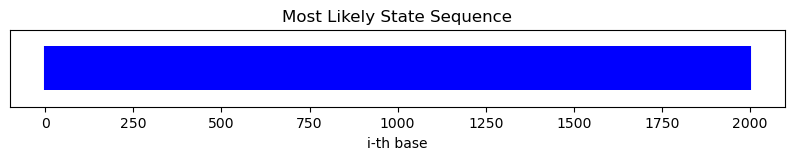

In [10]:
# plotting results for clarity
# this does take a while to compute, and probably isn't appropriate for larger data

state_colors = {'AT_rich ': 'blue', 'CG_rich ': 'green'}
state_colors_sequence = [state_colors[state] for state in path]

# plot the most likely state sequence
plt.figure(figsize=(10, 1))
for i, color in enumerate(state_colors_sequence):
    plt.scatter(i, 0, c=color, marker='|', s=1000)

plt.yticks([])
plt.xlabel("i-th base")
plt.title('Most Likely State Sequence')
plt.show()

Where AT Rich state is blue, and CG Rich is green. Here, clearly, all the bases are AT Rich, implying that there isn'a transition in the generation of the 2000 bases. This is not unreasonable, as the probability to go from AT Rich -> CG rich states is only 0.0003 or 0.03%. 

In [11]:
# importing text file for lambda phage virus
with open('enteriobacteriophage.txt', 'r') as file:
    dna_sequence = file.read().replace('\n', '')

    numeric_sequence = [base_mapping[base] for base in dna_sequence]    
states_dna = ['AT_rich ', 'CG_rich ']
    
path, probability = log_viterbi(numeric_sequence, states_dna, start_probabilities, transition_probabilities, emission_probabilities)

print('Most likely state sequence:\n', ''.join(path))

Most likely state sequence:
 AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_rich AT_

In [12]:
print('Probability of the sequence:', probability)

Probability of the sequence: 0.0


Probability is once again low as expected, possibly because the model isn't too appropriate for cases with probabilities having 0.0002/0.0003 chance of transitioning. Or legitemately, this is the probability, a value incredibly close to 0. The computer is unable to display it due to lack of precision. It is clear that when adding more and more parameters, the randomness begins to increase.